# HSB가 적용되었다는 가정하임!!!!!!

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from subprocess import call
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
%matplotlib inline
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from statsmodels.api import Logit
from sklearn.ensemble import RandomForestClassifier


In [35]:
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [36]:
df= pd.read_csv("/home/piai/test/2. Big Data 분석/SCALE불량.csv", encoding = 'euc-kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [38]:
df.drop(df[df["hsb"] == "미적용"].index, inplace=True)

df.drop(["pt_thick","pt_length","pt_width"],axis = 1, inplace = True)


In [37]:
df0 = df[df['scale']=="양품"]
df1 = df[df['scale']=="불량"]
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         690 non-null    object
 1   rolling_date     690 non-null    object
 2   scale            690 non-null    object
 3   spec_long        690 non-null    object
 4   spec_country     690 non-null    object
 5   steel_kind       690 non-null    object
 6   pt_thick         690 non-null    int64 
 7   pt_width         690 non-null    int64 
 8   pt_length        690 non-null    int64 
 9   hsb              690 non-null    object
 10  fur_no           690 non-null    object
 11  fur_input_row    690 non-null    object
 12  fur_heat_temp    690 non-null    int64 
 13  fur_heat_time    690 non-null    int64 
 14  fur_soak_temp    690 non-null    int64 
 15  fur_soak_time    690 non-null    int64 
 16  fur_total_time   690 non-null    int64 
 17  rolling_method   690 non-null    ob

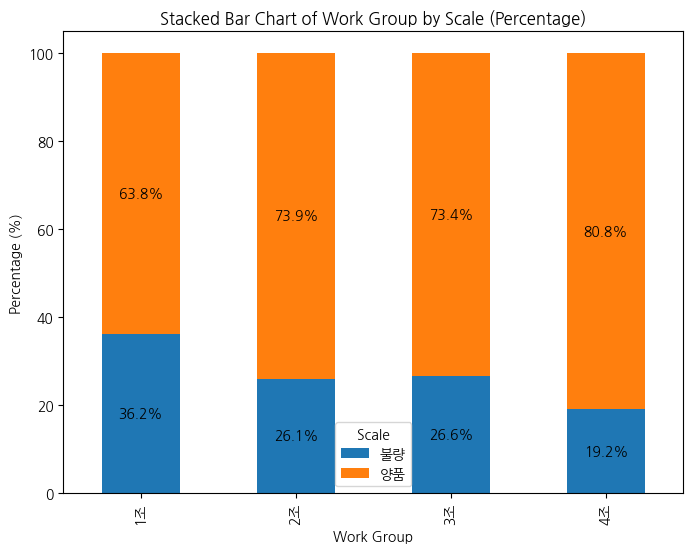

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# work_group별로 scale 값의 빈도를 계산하여 피벗 테이블 생성
data = df.groupby(['work_group', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("Stacked Bar Chart of Work Group by Scale (Percentage)")
plt.xlabel("Work Group")
plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()


1조와 4조의 비율 차이가 많이 나므로 (15%p) 개선교육이 필요함

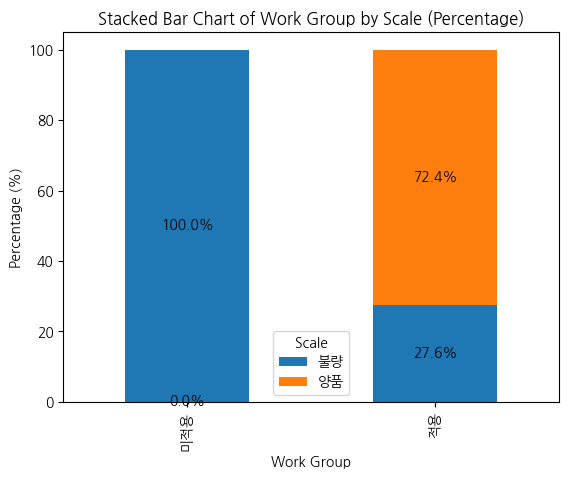

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

# work_group별로 scale 값의 빈도를 계산하여 피벗 테이블 생성
data = df.groupby(['hsb', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True)

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("Stacked Bar Chart of Work Group by Scale (Percentage)")
plt.xlabel("Work Group")
plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()

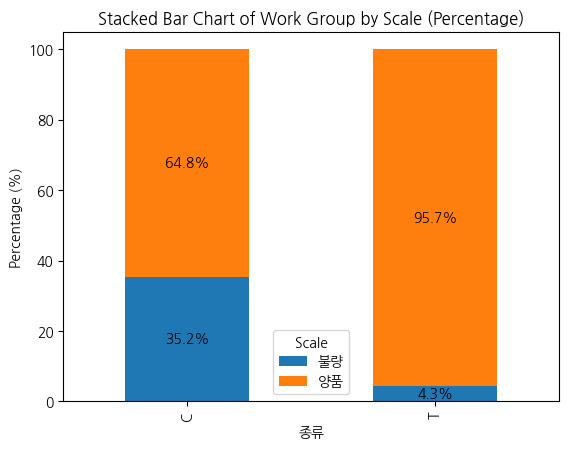

In [41]:
data = df.groupby(['steel_kind', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True)

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("Stacked Bar Chart of Work Group by Scale (Percentage)")
plt.xlabel("종류")
plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()

(hsb가 적용되어) 강종의 종류가 탄소일때, 불량률이 높다. 


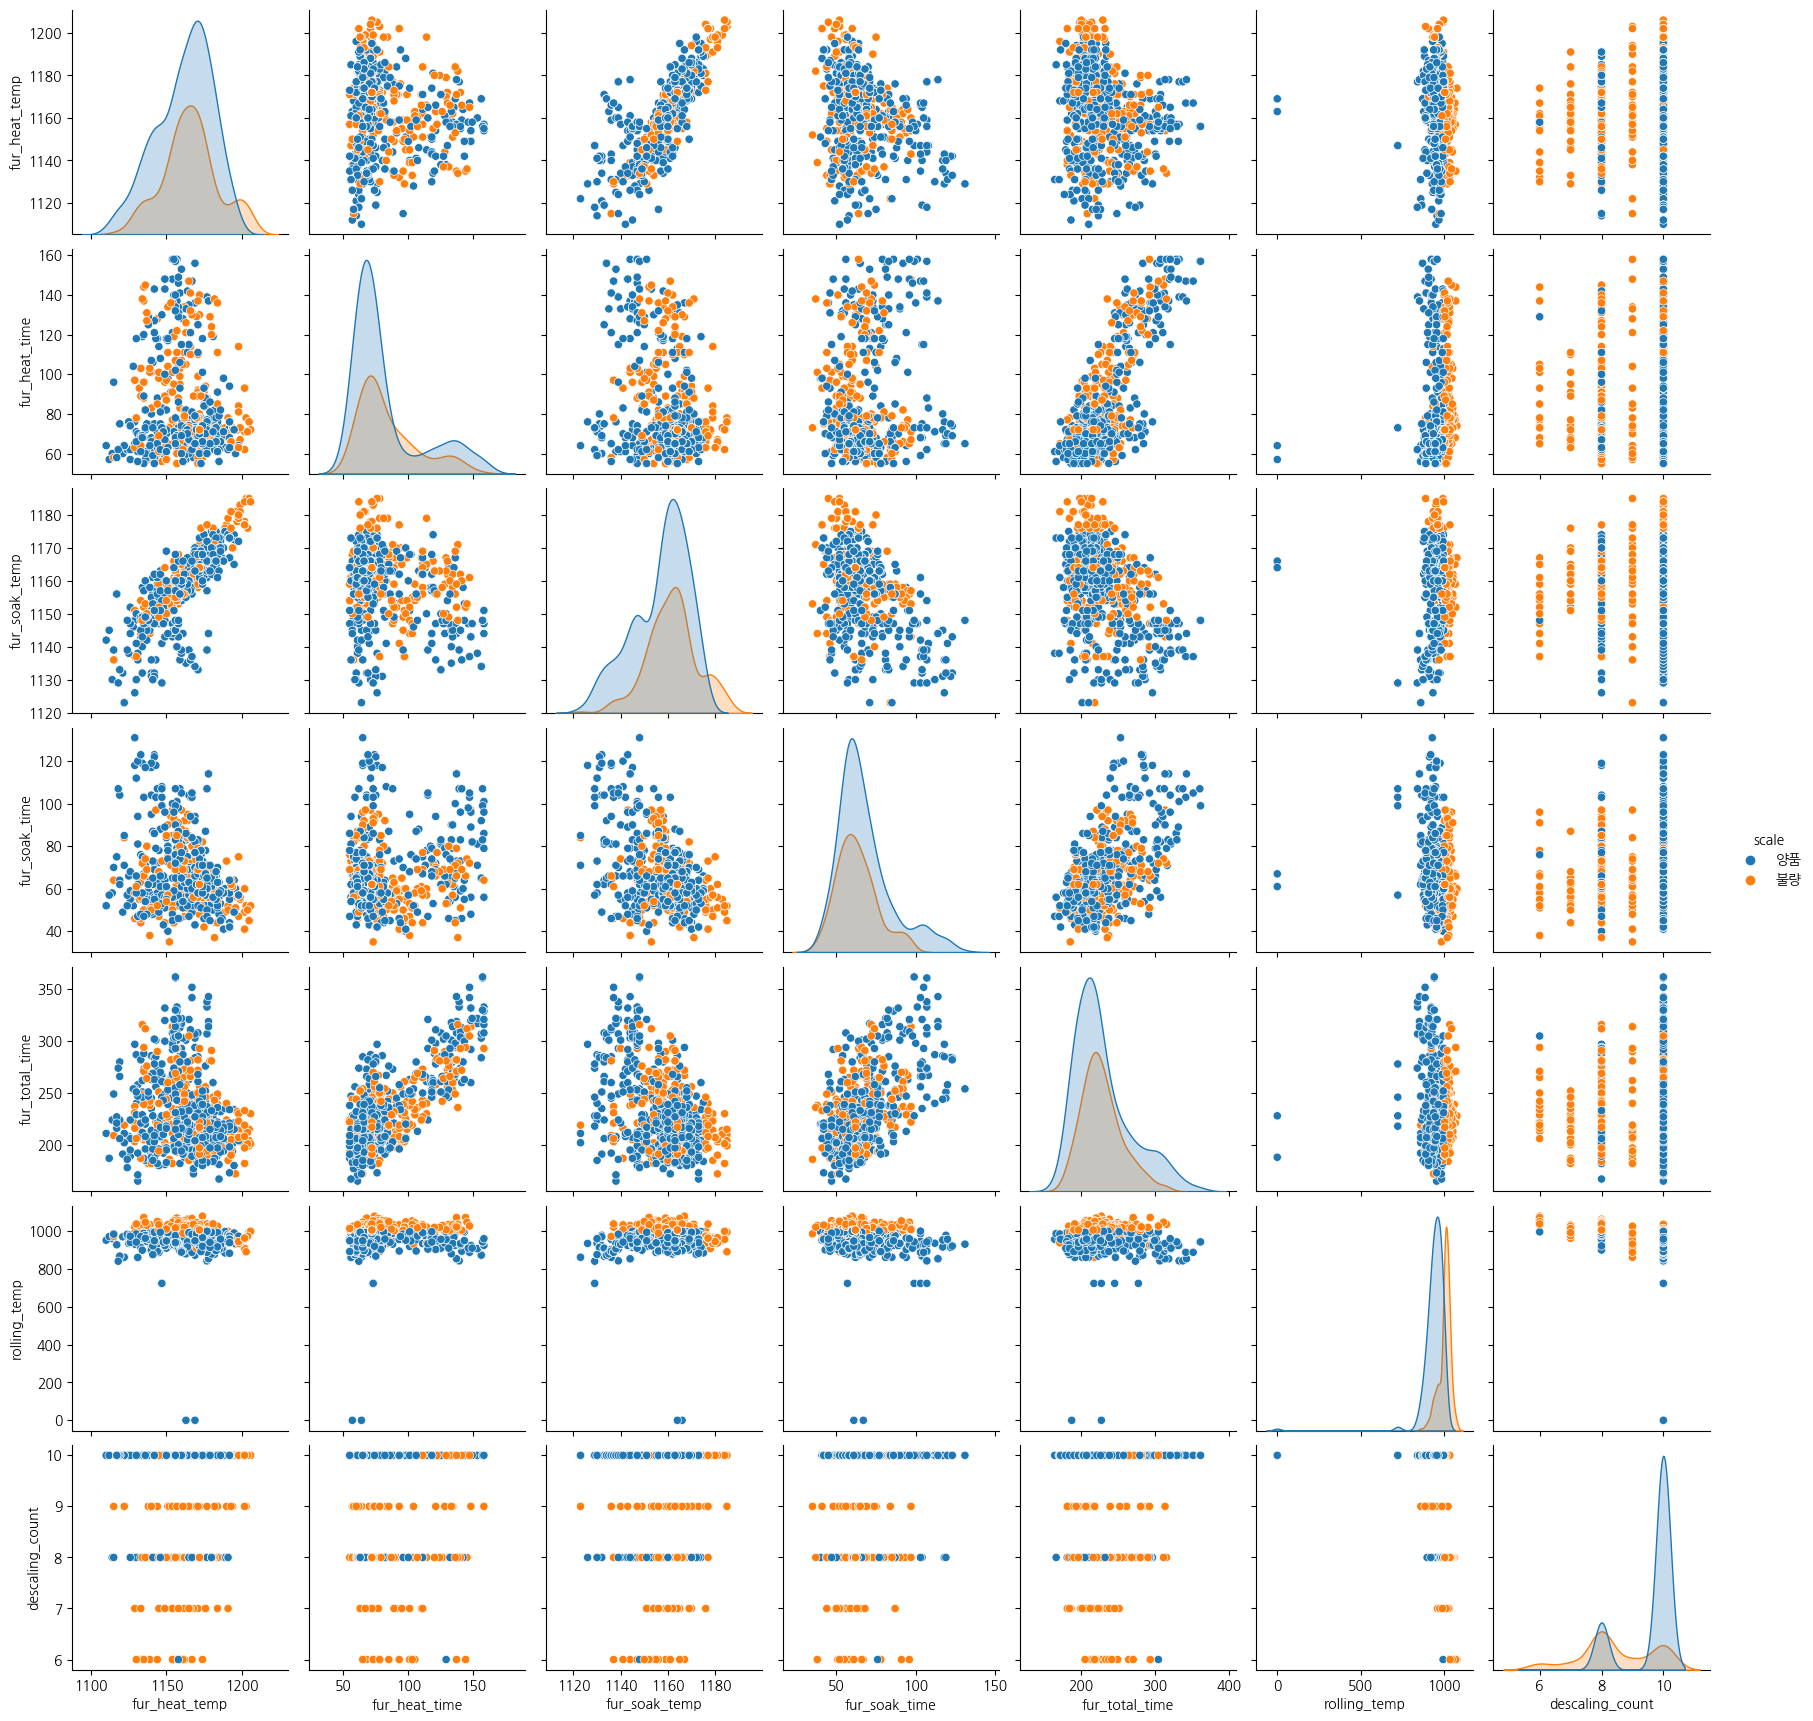

In [48]:
df_c = df.drop(df[df["steel_kind"] == "T"].index, inplace=False)
sns.pairplot(df_c, hue = "scale")

(hsb가 적용되었다는 가정) 강종의 종류가 탄소일때,  다른 변수와의 관계가 없어보임. 

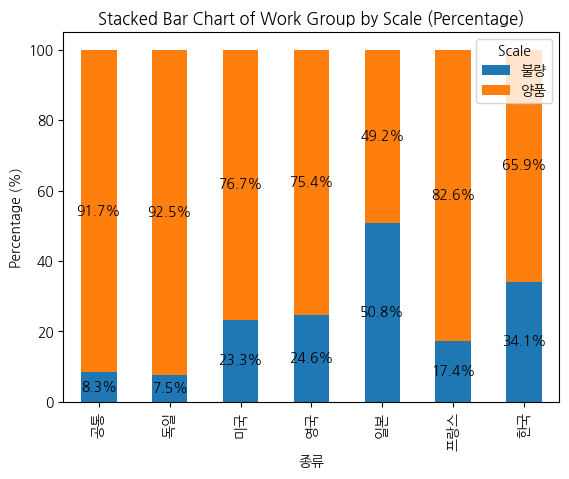

In [49]:
data = df.groupby(['spec_country', 'scale']).size().unstack(fill_value=0)

# 각 work_group의 전체 합계로 나눠서 비율 계산
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# 누적 막대그래프 그리기
ax = data_percentage.plot(kind='bar', stacked=True)

# 각 막대 위에 비율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# 그래프 제목과 레이블 설정
plt.title("Stacked Bar Chart of Work Group by Scale (Percentage)")
plt.xlabel("종류")
plt.ylabel("Percentage (%)")
plt.legend(title="Scale")
plt.show()

독일에 수출하는 스틸의 불량률은 낮고, 일본에 수출하는 스틸 불량률이 높다.
-> 개선사항: 없어보임 (일본이 탄소강을 많이 수입하므로 불량률이 높은것으로 보임) 
(독일은 경우, 티타늄강을 수입하므로, 불량률이 낮은것으로 보임)

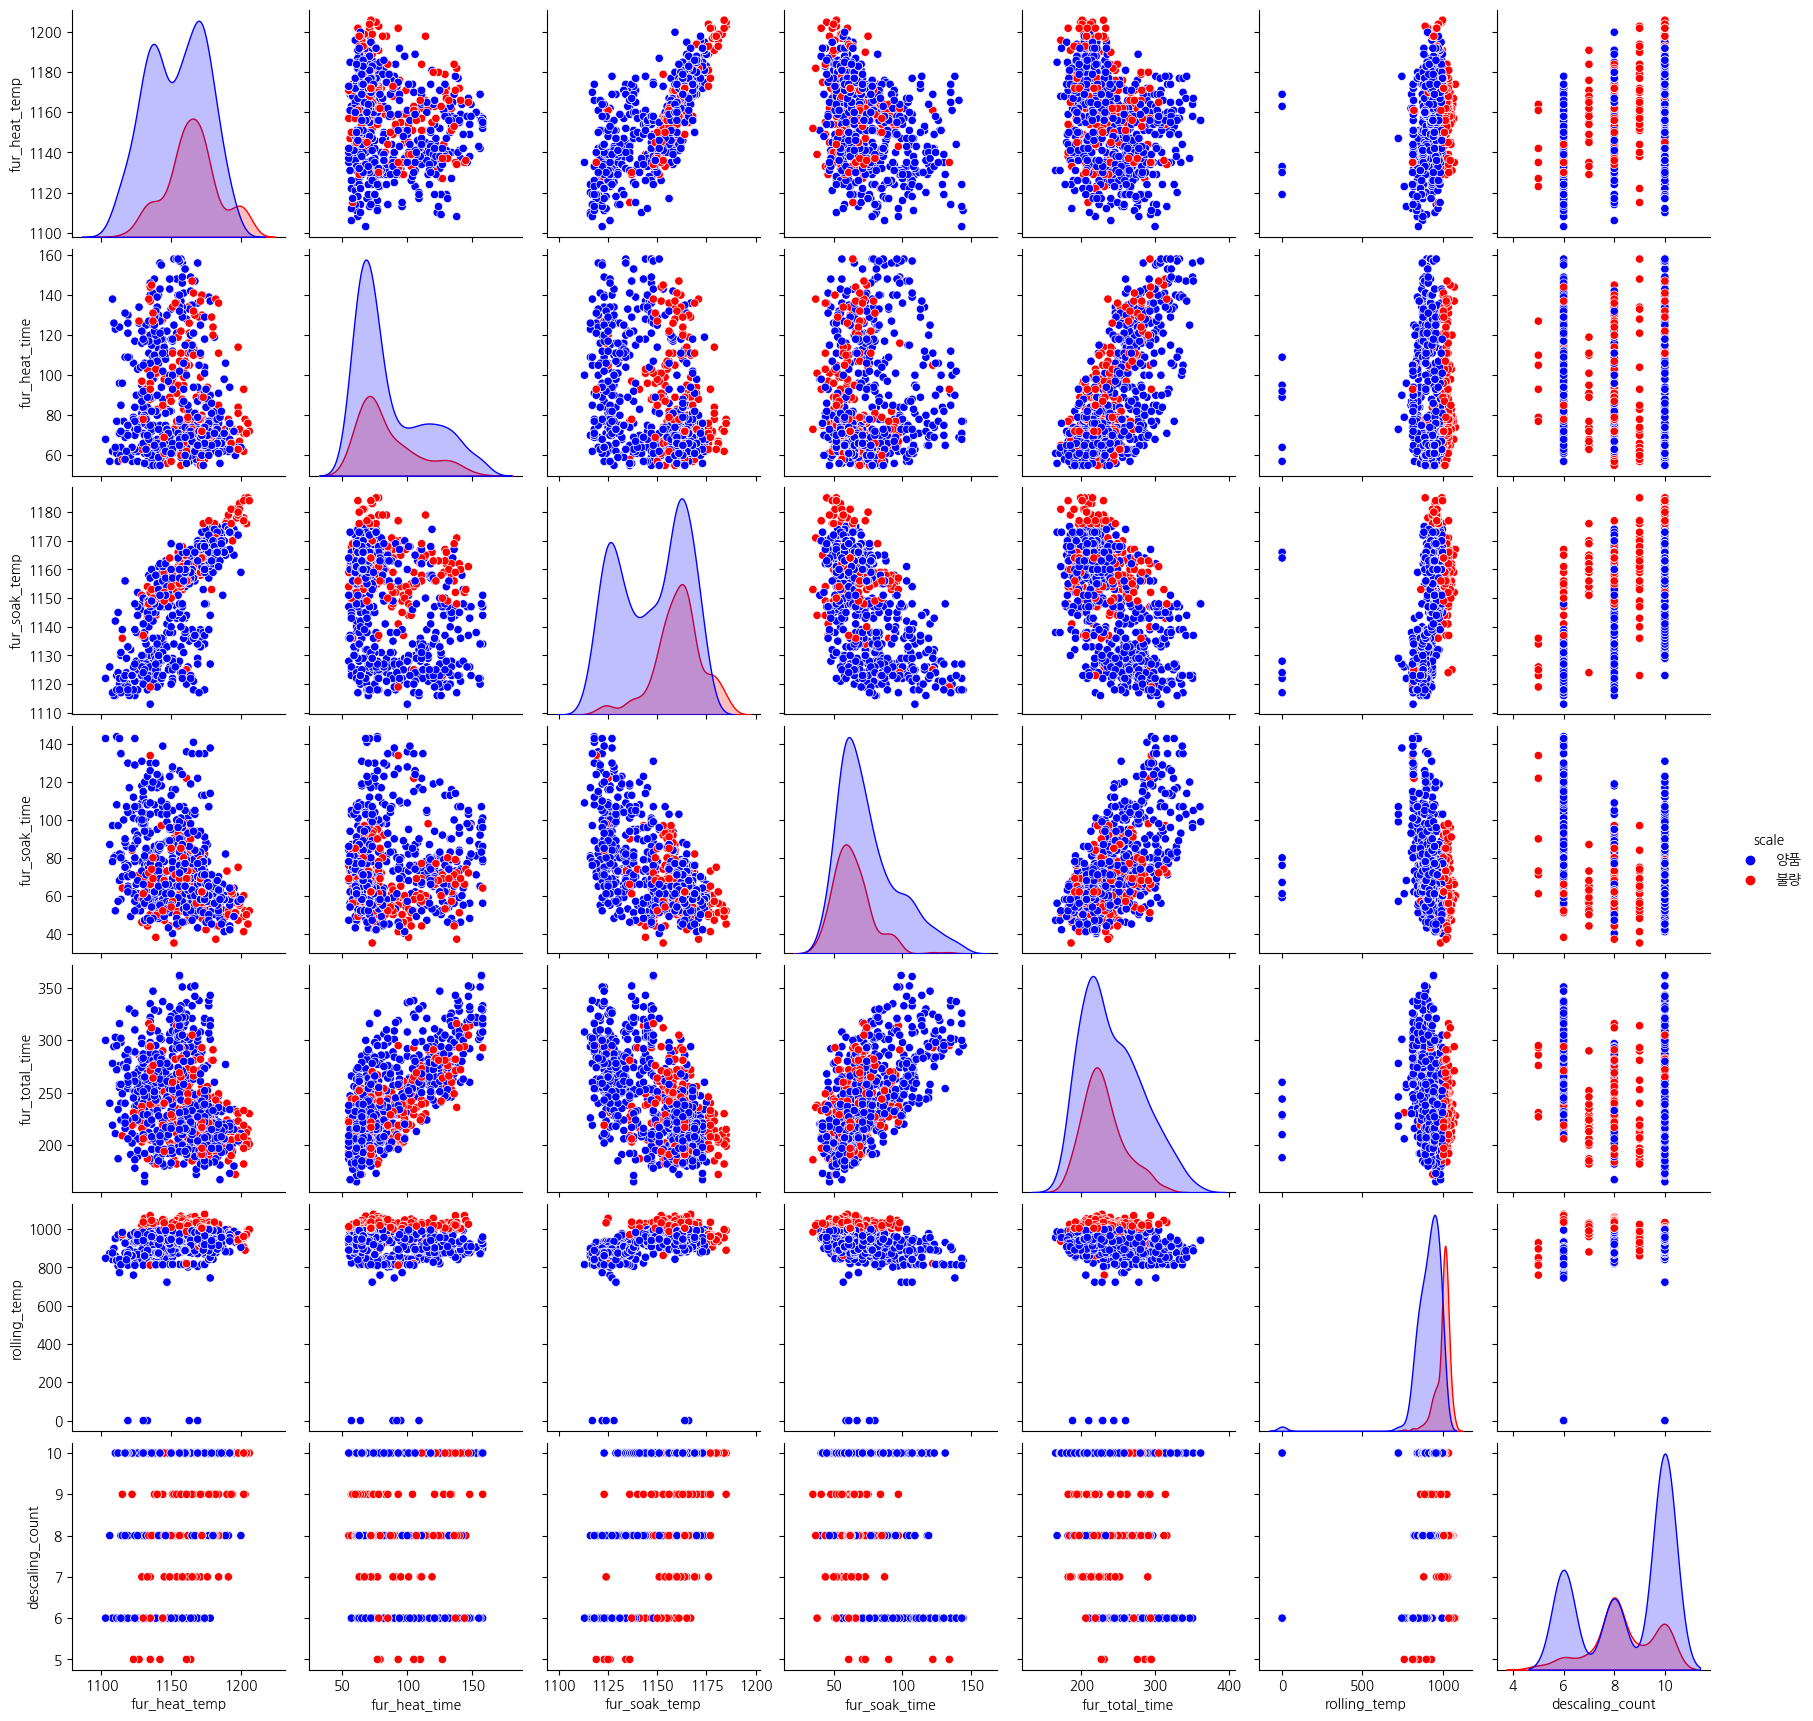

In [24]:

palette = {
    '불량': 'red', 
    '양품': 'blue', 
}
sns.pairplot(df, hue = "scale", palette=palette)

<Axes: xlabel='fur_heat_temp', ylabel='fur_soak_time'>

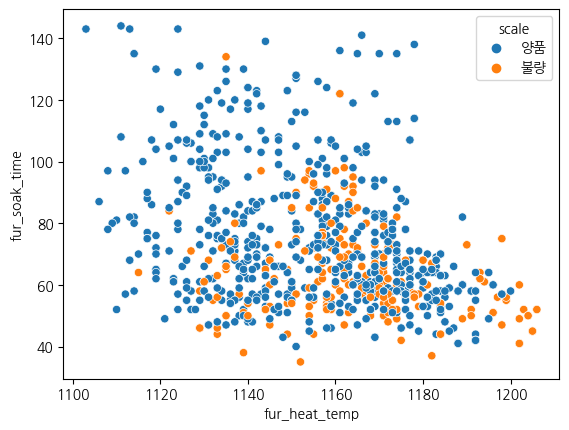

In [28]:
sns.scatterplot(x = 'fur_heat_temp', y= 'fur_soak_time', hue = 'scale', data = df)

<Axes: xlabel='fur_heat_time', ylabel='fur_soak_temp'>

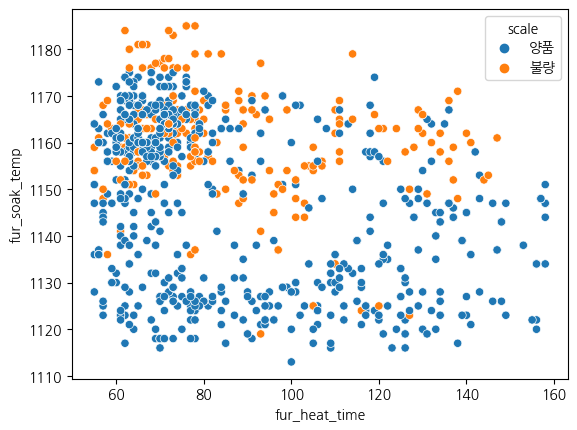

In [33]:
sns.scatterplot(x = 'fur_heat_time', y= 'fur_soak_temp', hue = 'scale', data = df)

<Axes: xlabel='fur_heat_time', ylabel='fur_soak_time'>

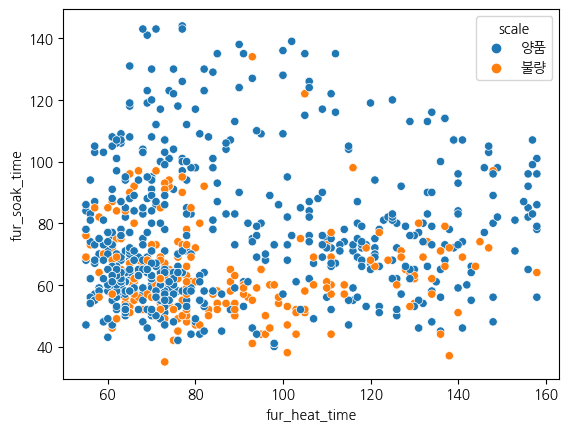

In [32]:
sns.scatterplot(x = 'fur_heat_time', y= 'fur_soak_time', hue = 'scale', data = df)

<Axes: xlabel='fur_heat_temp', ylabel='fur_soak_temp'>

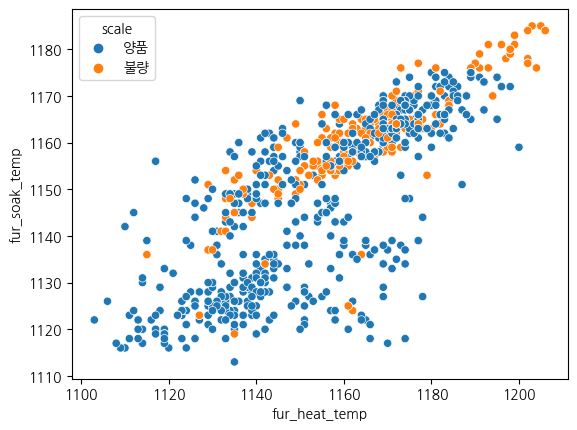

In [31]:
sns.scatterplot(y= 'fur_soak_temp', x= 'fur_heat_temp', hue = 'scale', data = df)

hsb 적용일때, heat온도, soak온도가 높으면 불량률이 증가한다. 